In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('C:\\Users\\hp\\Desktop\\scrapping\\salary_data_cleaned.csv')

In [141]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,age_of_company,python_yu,R_yn,spark,aws,excel,sql
0,Quality Systems Data Science Engineer,$52K-$101K (Glassdoor est.),It is our people behind life’s passions who wi...,3.7,Mercury Marine\n3.7,"Fond du Lac, WI",-1,1001 to 5000 Employees,1939,Company - Public,...,76.5,Mercury Marine\n,WI,81,0,0,0,0,1,1
1,"VP, Data Science",$52K-$101K (Glassdoor est.),"We are looking for a VP, Data Science to lead ...",3.9,"7Park Data, LLC\n3.9","New York, NY",-1,51 to 200 Employees,2012,Company - Private,...,76.5,"7Park Data, LLC\n",NY,8,1,0,1,0,1,0
2,Digital Analyst,$52K-$101K (Glassdoor est.),About the Company: *\nDarn Tough Vermont® is a...,5.0,Darn Tough Vermont\n5.0,"Waterbury, VT",-1,201 to 500 Employees,-1,Company - Private,...,76.5,Darn Tough Vermont\n,VT,-1,0,0,0,0,0,0
3,Data Scientist,$52K-$101K (Glassdoor est.),Job Description:\n\nMetron is seeking talented...,3.0,"Metron, Inc.\n3.0","Reston, VA",-1,51 to 200 Employees,-1,Company - Private,...,76.5,"Metron, Inc.\n",VA,-1,1,0,0,0,1,1
4,"Product Manager, Panel Data Science",$52K-$101K (Glassdoor est.),We are looking for an exceptional Product Mana...,4.0,Numerator\n4.0,"Chicago, IL",-1,1001 to 5000 Employees,2004,Company - Private,...,76.5,Numerator\n,IL,16,0,0,0,0,0,1


In [142]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age_of_company', 'python_yu', 'R_yn', 'spark', 'aws',
       'excel', 'sql'],
      dtype='object')

In [143]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'pricipal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

#Job title and seniority

#Fix State the space

#Job describtion length

#Comptitor count

#hourly wage to annual

#remove new line from job title

In [144]:
#Job title and seniority
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [145]:
df.job_simp.value_counts()

data scientist    482
na                294
data engineer     114
mle                46
manager            38
director           26
Name: job_simp, dtype: int64

In [146]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        832
senior    166
jr          2
Name: seniority, dtype: int64

In [147]:
#Fix the space
#df.job_state.value_counts()
df['job_state'] = df.job_state.apply(lambda x: x.strip())
df.job_state.value_counts()

CA               193
VA               130
NY               103
MA                61
MD                56
IL                44
TX                39
WA                32
MO                32
CO                28
GA                25
PA                24
DC                21
OH                20
NC                19
Remote            18
UT                17
FL                15
United States     14
MI                12
NJ                11
IN                10
WI                10
MN                 9
AZ                 8
CT                 7
DE                 6
AL                 6
NH                 4
TN                 4
VT                 4
OR                 3
WV                 2
ID                 2
SC                 2
RI                 2
IA                 1
KS                 1
LA                 1
OK                 1
NV                 1
WY                 1
ME                 1
Name: job_state, dtype: int64

In [148]:
#Job describtion length
df['desc_len'] = df['Job Description'].apply(len)
df['desc_len']

0      2836
1      2397
2      4511
3      1886
4      4274
5      4176
6      3157
7      4474
8      2634
9      5466
10     5212
11     6474
12     5061
13     3514
14     8608
15     7249
16     3459
17     5960
18     3283
19     8221
20     4657
21     5804
22     1752
23     5964
24     2939
25     2144
26     4291
27     5091
28     3468
29     1484
30     3049
31     3021
32     3786
33     4653
34     1983
35     5734
36     3567
37     4118
38     5955
39     7786
40     1625
41     5278
42     3496
43     3663
44     4519
45     2896
46     9568
47     3748
48     3785
49     3527
50     1704
51     4869
52     3155
53     3586
54     1408
55     4725
56     3170
57     3584
58     2407
59     4574
60     2315
61     2095
62     3482
63     3449
64     2162
65     5020
66     2095
67     3422
68     2692
69     3002
70     1782
71     2150
72     2668
73     4523
74     1097
75     3505
76     8704
77     5630
78     1388
79     3711
80     3989
81     3356
82     6568
83  

In [149]:
#Comptitor count
df['Competitors'].values.dtype
df['num_comp'] = df['Competitors'].apply(lambda x: 0 if x == -1 else x)

In [150]:
df['num_comp']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [151]:
df['Competitors']

0     -1
1     -1
2     -1
3     -1
4     -1
5     -1
6     -1
7     -1
8     -1
9     -1
10    -1
11    -1
12    -1
13    -1
14    -1
15    -1
16    -1
17    -1
18    -1
19    -1
20    -1
21    -1
22    -1
23    -1
24    -1
25    -1
26    -1
27    -1
28    -1
29    -1
30    -1
31    -1
32    -1
33    -1
34    -1
35    -1
36    -1
37    -1
38    -1
39    -1
40    -1
41    -1
42    -1
43    -1
44    -1
45    -1
46    -1
47    -1
48    -1
49    -1
50    -1
51    -1
52    -1
53    -1
54    -1
55    -1
56    -1
57    -1
58    -1
59    -1
60    -1
61    -1
62    -1
63    -1
64    -1
65    -1
66    -1
67    -1
68    -1
69    -1
70    -1
71    -1
72    -1
73    -1
74    -1
75    -1
76    -1
77    -1
78    -1
79    -1
80    -1
81    -1
82    -1
83    -1
84    -1
85    -1
86    -1
87    -1
88    -1
89    -1
90    -1
91    -1
92    -1
93    -1
94    -1
95    -1
96    -1
97    -1
98    -1
99    -1
100   -1
101   -1
102   -1
103   -1
104   -1
105   -1
106   -1
107   -1
108   -1
109   -1
110   -1
1

In [152]:
#hourly wage to annual
df['hourly'].unique()

array([0], dtype=int64)

In [153]:
#remove new line from job title
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [154]:
df['company_txt']

0                                         Mercury Marine
1                                        7Park Data, LLC
2                                     Darn Tough Vermont
3                                           Metron, Inc.
4                                              Numerator
5                                              Numerator
6                                   Red Ventures - Sales
7                                    Chenega Corporation
8                                     Abaco Systems, Inc
9                         Energy Transfer Partners, L.P.
10                    Alliant Cooperative Data Solutions
11                     ManTech International Corporation
12                  Airlines Reporting Corporation (ARC)
13                Government Employees Insurance Company
14     Wisconsin Physicians Service Insurance Corpora...
15                          Wings Financial Credit Union
16                                          IXIS Digital
17                    Alliant C

In [155]:
#let's drive in
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,min_salary,max_salary,avg_salary,age_of_company,python_yu,R_yn,spark,aws,excel,sql,desc_len,num_comp
count,1000.000000,1000.0,1000.00000,1000.0,1000.0,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,3.699400,-1.0,1787.82500,-1.0,0.0,70.34800,121.95000,96.149000,27.953000,0.660000,0.002000,0.229000,0.270000,0.465000,0.611000,3775.160000,0.0
std,1.090426,0.0,600.75864,0.0,0.0,24.09073,34.95479,29.290839,33.861474,0.473946,0.044699,0.420399,0.444182,0.499023,0.487767,1487.732141,0.0
min,-1.000000,-1.0,-1.00000,-1.0,0.0,29.00000,66.00000,48.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,327.000000,0.0
25%,3.400000,-1.0,1962.75000,-1.0,0.0,51.00000,97.00000,73.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2746.250000,0.0
50%,3.800000,-1.0,1998.00000,-1.0,0.0,70.00000,118.00000,93.000000,15.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3631.500000,0.0
75%,4.300000,-1.0,2009.00000,-1.0,0.0,82.00000,141.00000,111.500000,34.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4651.500000,0.0
max,5.000000,-1.0,2019.00000,-1.0,0.0,131.00000,207.00000,169.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9683.000000,0.0


In [156]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age_of_company', 'python_yu', 'R_yn', 'spark', 'aws',
       'excel', 'sql', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

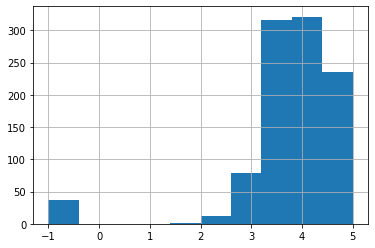

In [157]:
df.Rating.hist()

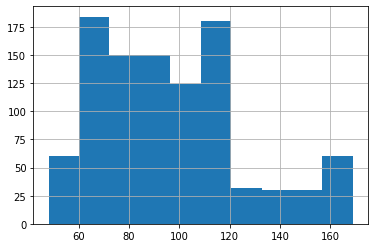

In [158]:
df.avg_salary.hist()

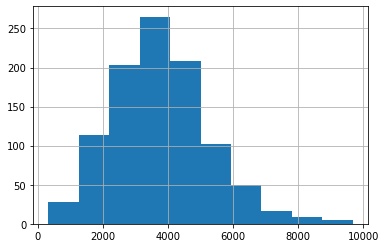

In [159]:
df.desc_len.hist()

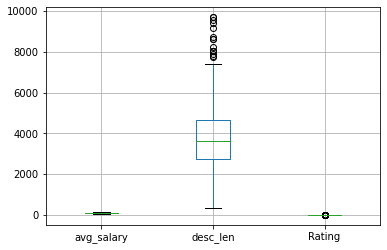

In [160]:
df.boxplot(column = ['avg_salary','desc_len', 'Rating'])

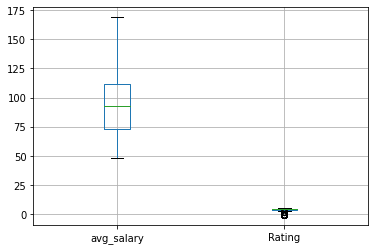

In [161]:
df.boxplot(column = ['avg_salary', 'Rating'])

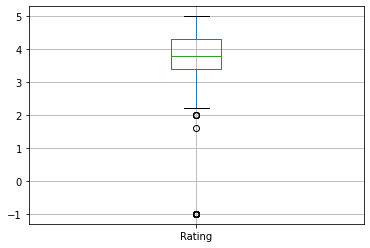

In [162]:
df.boxplot(column = ['Rating'])

In [163]:
correlation = df[['avg_salary','desc_len', 'Rating', 'age_of_company']].corr()
correlation

,avg_salary,desc_len,Rating,age_of_company
avg_salary,1.000000,-0.026352,0.013758,0.096570
desc_len,-0.026352,1.000000,-0.014010,0.221074
Rating,0.013758,-0.014010,1.000000,0.023843
age_of_company,0.096570,0.221074,0.023843,1.000000


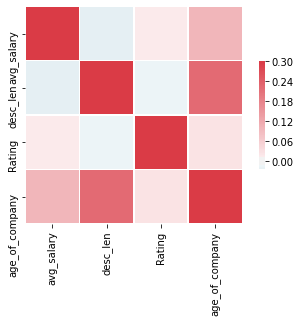

In [164]:
cmap = sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(correlation, vmax = .3, center = 0, cmap = cmap, square = True, linewidths = .5, cbar_kws = {'shrink': .5})

In [165]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age_of_company', 'python_yu', 'R_yn', 'spark', 'aws',
       'excel', 'sql', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [166]:
df_cat = df[['Location','Size', 'Type of ownership', 'Industry' ,'Sector', 'Revenue', 'company_txt', 'job_state','spark', 'aws', 'job_simp', 'seniority']]

graph for Location: toltal = 236


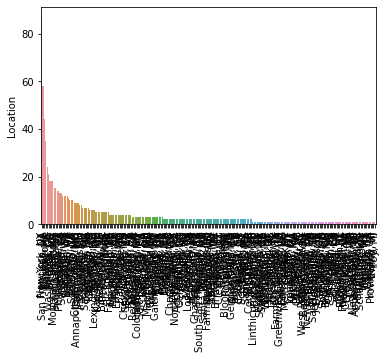

graph for Size: toltal = 9


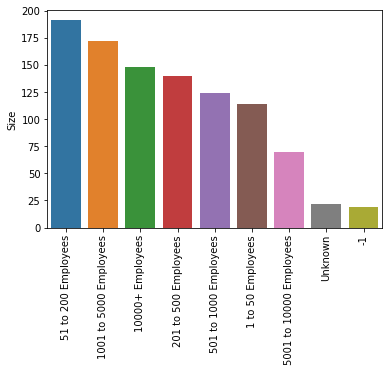

graph for Type of ownership: toltal = 13


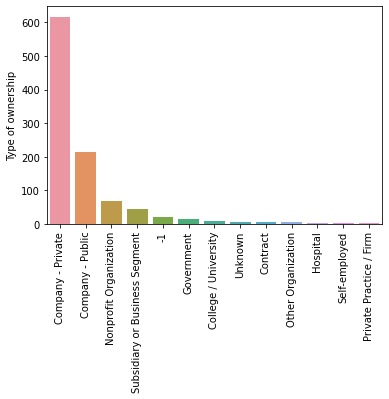

graph for Industry: toltal = 71


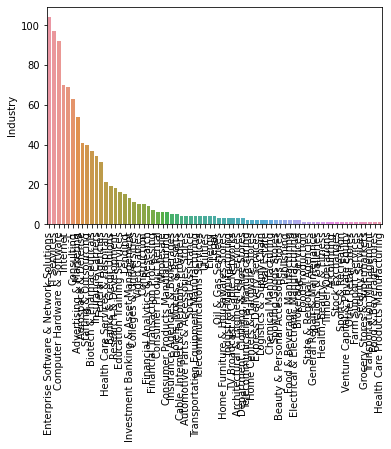

graph for Sector: toltal = 24


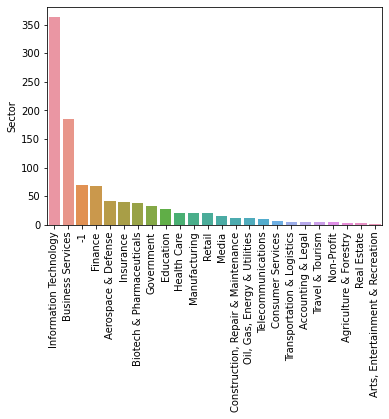

graph for Revenue: toltal = 14


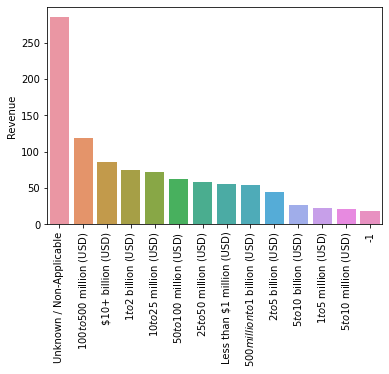

graph for company_txt: toltal = 509


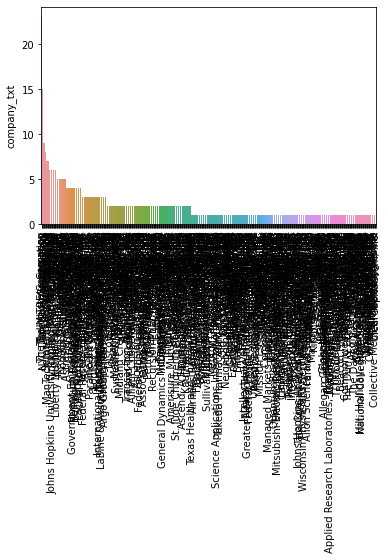

graph for job_state: toltal = 43


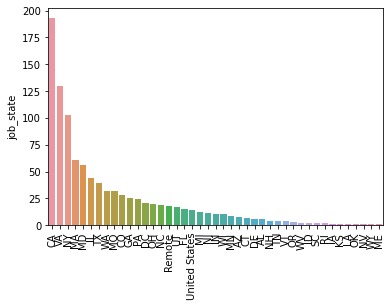

graph for spark: toltal = 2


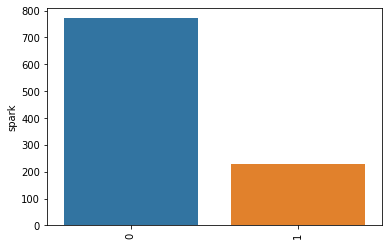

graph for aws: toltal = 2


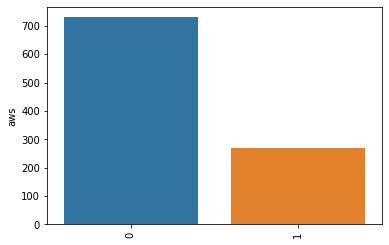

graph for job_simp: toltal = 6


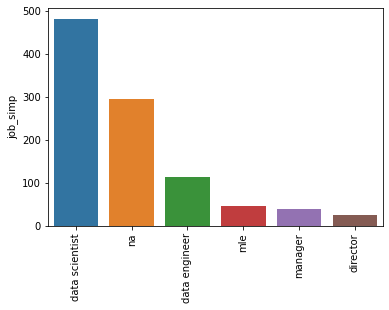

graph for seniority: toltal = 3


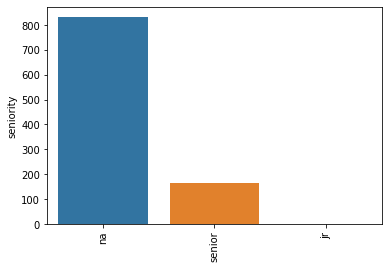

In [167]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: toltal = %d" % (i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

graph for Location: toltal = 20


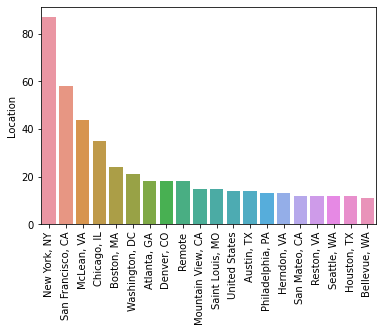

graph for company_txt: toltal = 20


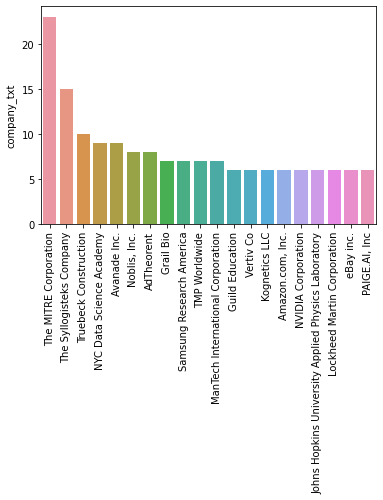

graph for Industry: toltal = 20


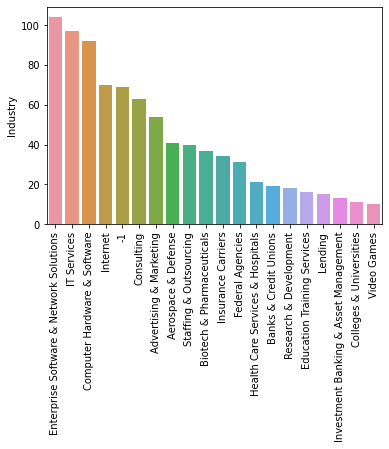

graph for job_state: toltal = 20


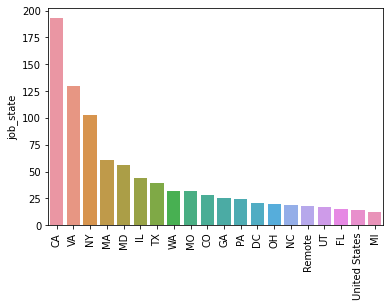

In [168]:
for i in df_cat[['Location','company_txt','Industry', 'job_state']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: toltal = %d" % (i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [169]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age_of_company', 'python_yu', 'R_yn', 'spark', 'aws',
       'excel', 'sql', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [170]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
data engineer,96.114035
data scientist,94.012448
director,115.826923
manager,100.092105
mle,100.565217
na,96.724490


In [171]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
data engineer  na          96.363158
               senior      94.868421
data scientist na          92.862269
               senior     103.950000
director       na         115.239130
               senior     120.333333
manager        na         100.621212
               senior      96.600000
mle            na         100.744444
               senior      92.500000
na             jr          92.750000
               na          96.154412
               senior      98.136364

In [172]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state')

avg_salary
job_state     job_simp                  
AL            data engineer            5
              na                       1
AZ            data engineer            1
              data scientist           3
              mle                      1
              na                       3
CA            data engineer           14
              data scientist          94
              director                 5
              manager                  7
              mle                     12
              na                      61
CO            data engineer            3
              data scientist          12
              na                      13
CT            data scientist           5
              data engineer            2
DC            data scientist          13
              mle                      1
              na                       7
DE            na                       6
FL            na                       9
              data scientist           4
              director                 1
              manager                  1
GA            data engineer            3
              data scientist           9
              manager                  6
              na                       7
IA            data engineer            1
ID            na                       2
IL            na                      12
              manager                  7
              data engineer            5
              data scientist          17
              director                 3
IN            data engineer            2
              director                 1
              na                       7
KS            mle                      1
LA            manager                  1
MA            data engineer            3
              data scientist          36
              director                 1
              manager                  1
              mle                      5
              na                      15
MD            na                      21
              mle                      2
              data scientist          29
              data engineer            4
ME            na                       1
MI            data engineer            2
              data scientist           4
              manager                  1
              na                       5
MN            data scientist           3
              director                 1
              na                       5
MO            data engineer           11
              data scientist          14
              na                       7
NC            na                       4
              manager                  4
              data scientist           8
              director                 2
              data engineer            1
NH            manager                  4
NJ            data scientist           6
              na                       5
NV            data engineer            1
NY            data engineer           15
              data scientist          51
              director                 6
              manager                  4
              mle                      2
              na                      25
OH            mle                      1
              na                       3
              data scientist          16
OK            na                       1
OR            data scientist           3
PA            data engineer            7
              data scientist           7
              na                      10
RI            data engineer            1
              na                       1
Remote        data engineer            3
              data scientist           5
              director                 2
              mle                      4
              na                       4
SC            na                       1
              director                 1
TN            na                       1
              data scientist           3
TX          

In [173]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('avg_salary' , ascending = False)

,,avg_salary
job_state,job_simp,
OR,data scientist,117.833333
Remote,data scientist,117.300000
CT,data scientist,110.200000
TX,data scientist,109.821429
AZ,data scientist,108.666667
GA,data scientist,107.222222
NJ,data scientist,104.416667
PA,data scientist,100.714286
FL,data scientist,99.875000


In [174]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'age_of_company', 'python_yu', 'R_yn', 'spark', 'aws',
       'excel', 'sql', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [175]:
#rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r ,spark, aws ,excel, desc_len, Type of ownership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'python_yu', 'R_yn', 'spark', 'aws',
       'excel', 'desc_len', 'Type of ownership', 'avg_salary']]

In [176]:
for i in df_pivots.columns:
    print(i)
    table = pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False)
    print(table)

Rating
        avg_salary
Rating            
 2.3    142.750000
 2.6    108.500000
 4.8    107.433333
 2.0    107.250000
 1.6    106.000000
 4.4    105.532258
 3.4    104.815789
 2.8    103.583333
 4.3    101.150000
 4.7    100.839286
 4.1     99.238095
 3.2     98.656250
 2.9     97.764706
 4.2     96.487805
 4.5     96.482759
 3.8     96.012821
 4.6     95.872093
 3.5     95.509804
 3.0     94.760870
 2.5     94.500000
 4.0     93.719298
 3.3     93.706897
 3.7     93.410448
 3.9     93.075342
 2.2     93.000000
-1.0     92.729730
 3.6     91.242188
 5.0     91.211111
 3.1     88.088235
 4.9     85.266667
 2.7     84.000000
Industry
                                         avg_salary
Industry                                           
Venture Capital & Private Equity         169.000000
Food & Beverage Stores                   169.000000
Accounting                               163.000000
Auctions & Galleries                     163.000000
Real Estate                              145.

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [177]:
pd.pivot_table(df_pivots, index = "Revenue", columns = 'python_yu', values = 'avg_salary', aggfunc = 'count')

python_yu,0,1
Revenue,,
$1 to $2 billion (USD),29,46
$1 to $5 million (USD),5,17
$10 to $25 million (USD),21,51
$10+ billion (USD),21,65
$100 to $500 million (USD),52,67
$2 to $5 billion (USD),20,25
$25 to $50 million (USD),22,37
$5 to $10 billion (USD),14,12
$5 to $10 million (USD),11,10


In [178]:
#import nltk
#nltk.download()

In [179]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

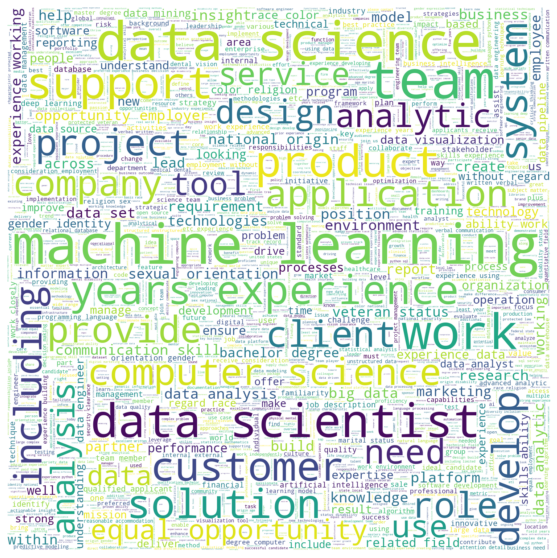

In [190]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear",)
plt.axis('off')
plt.show()